# CRISP DM on Tesla Stock Market Dataset

In [4]:
import pandas as pd
from google.colab import files
import io
import pandas as pd
from google.colab import files
import io
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

In [6]:
uploaded = files.upload()
tesla_data = pd.read_csv(io.BytesIO(uploaded["TSLA.csv"]))
tesla_data.head()

Saving TSLA.csv to TSLA.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


# Understanding the dataset

In [20]:
summary_stats = tesla_data.describe()

missing_values = tesla_data.isnull().sum()

data_types = tesla_data.dtypes

summary_stats, missing_values, data_types

(              Open         High          Low        Close    Adj Close  \
 count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
 mean    138.691296   141.771603   135.425953   138.762183   138.762183   
 std     250.044839   255.863239   243.774157   250.123115   250.123115   
 min       3.228000     3.326000     2.996000     3.160000     3.160000   
 25%      19.627000    20.402000    19.127500    19.615000    19.615000   
 50%      46.656999    47.487001    45.820002    46.545000    46.545000   
 75%      68.057001    69.357500    66.911501    68.103998    68.103998   
 max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   
 
              Volume  
 count  2.956000e+03  
 mean   3.131449e+07  
 std    2.798383e+07  
 min    5.925000e+05  
 25%    1.310288e+07  
 50%    2.488680e+07  
 75%    3.973875e+07  
 max    3.046940e+08  ,
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dt

In [8]:
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# Data Visualization

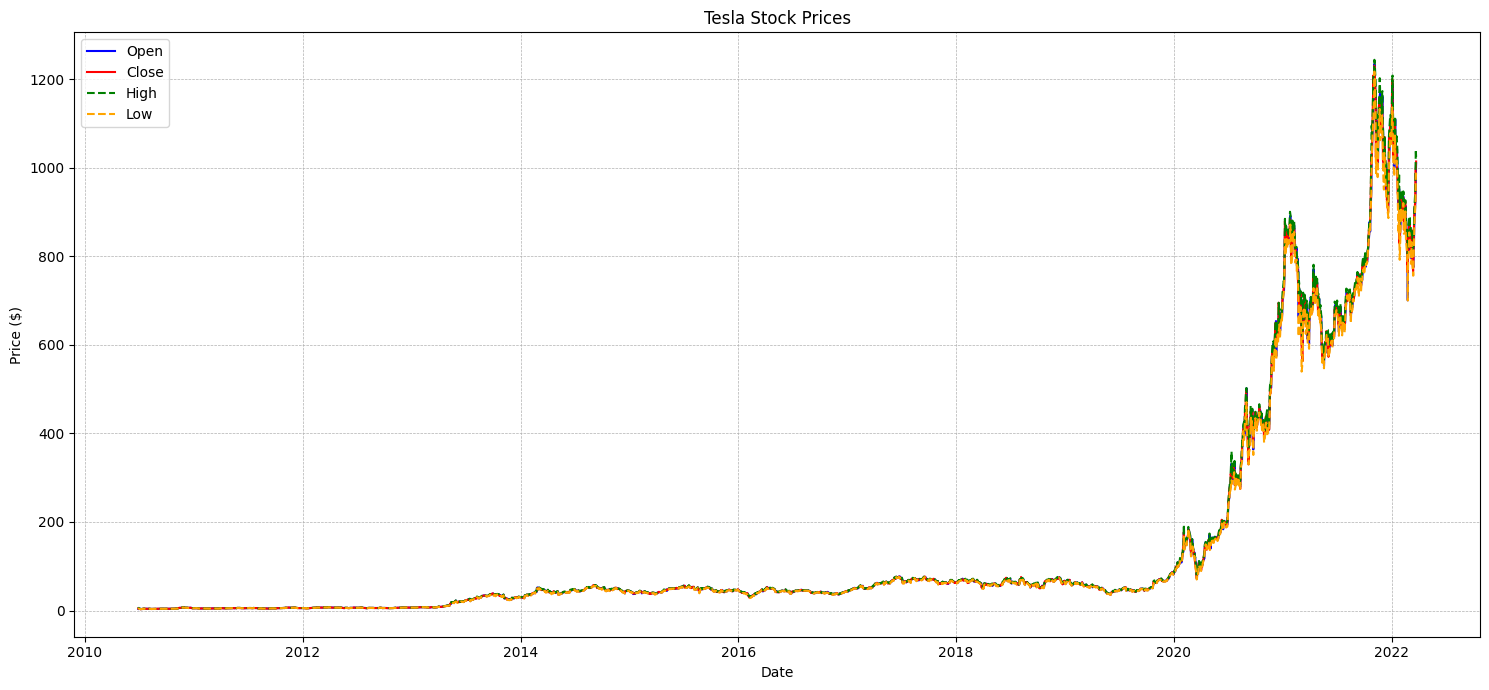

In [9]:
fix, ax = plt.subplots(figsize=(15, 7))

ax.plot(tesla_data["Date"], tesla_data["Open"], label="Open", color="blue")
ax.plot(tesla_data["Date"], tesla_data["Close"], label="Close", color="red")
ax.plot(tesla_data["Date"], tesla_data["High"], label="High", color="green", linestyle="--")
ax.plot(tesla_data["Date"], tesla_data["Low"], label="Low", color="orange", linestyle="--")

ax.set_title("Tesla Stock Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price ($)")
ax.legend()

plt.tight_layout()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

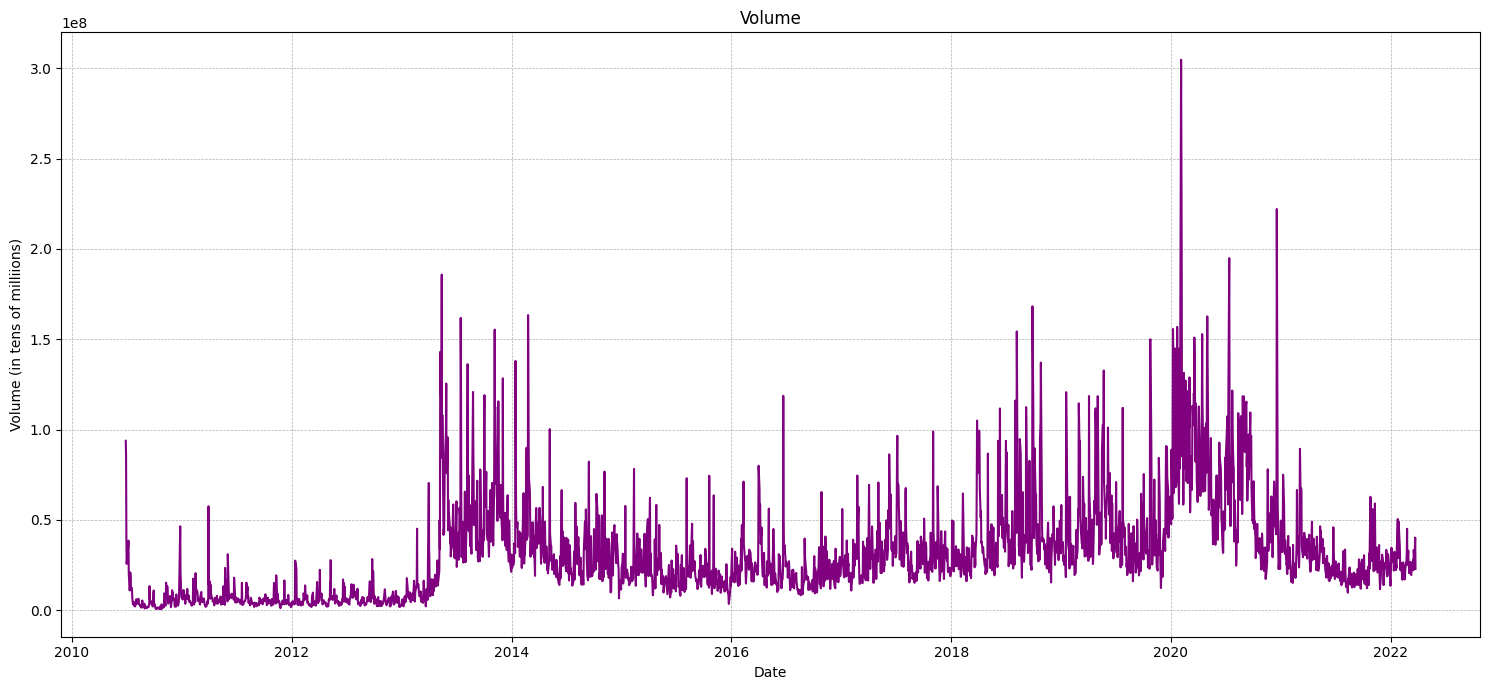

In [10]:
fix, ax = plt.subplots(figsize=(15, 7))
ax.plot(tesla_data["Date"], tesla_data["Volume"], color="purple")

ax.set_title("Volume")
ax.set_xlabel("Date")
ax.set_ylabel("Volume (in tens of milliions)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.tight_layout()
plt.show()

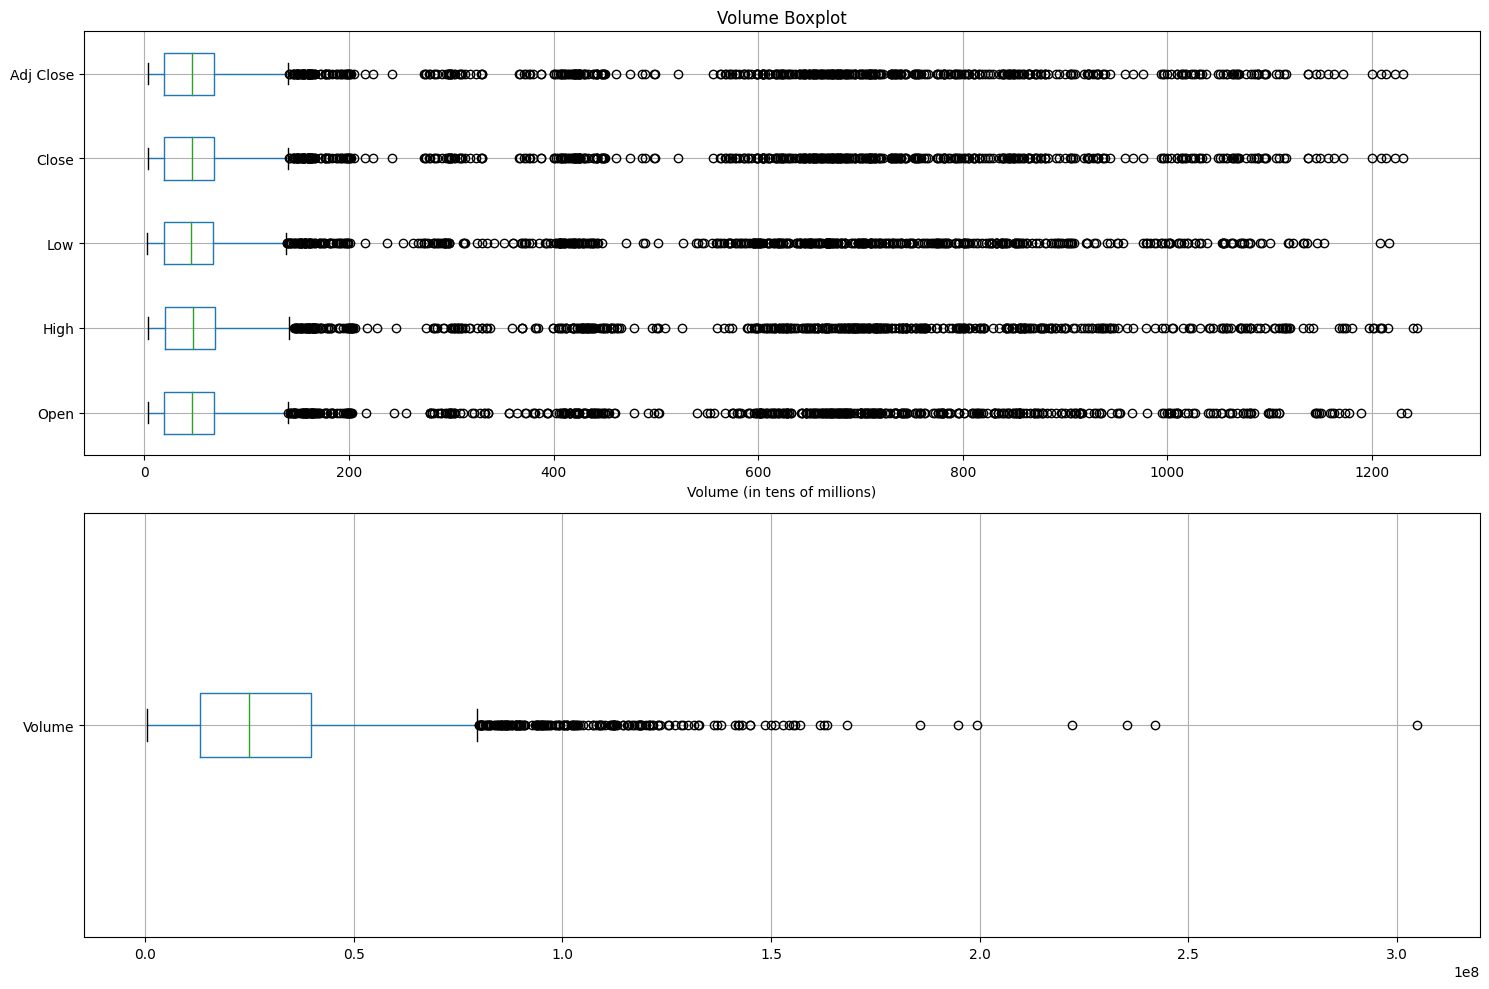

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
price_columns = ["Open", "High", "Low", "Close", "Adj Close"]
tesla_data[price_columns].boxplot(ax=axs[0], vert=False)
axs[0].set_title("Prices Boxplot")
axs[0].set_xlabel("Prices ($)")

tesla_data[["Volume"]].boxplot(ax=axs[1], vert=False)
axs[0].set_title("Volume Boxplot")
axs[0].set_xlabel("Volume (in tens of millions)")

plt.tight_layout()
plt.show()

# Data Validation



In [12]:
duplicate_rows = tesla_data.duplicated().sum()

negative_prices = (tesla_data[price_columns] < 0).sum().sum()
negative_volume = (tesla_data["Volume"] < 0).sum()

duplicate_rows, negative_prices, negative_volume

(0, 0, 0)

# Data Preparation

In [13]:
train_data, test_data = train_test_split(tesla_data, test_size=0.2, shuffle=False)
train_data.shape, test_data.shape

((2364, 7), (592, 7))

In [14]:
baseline_predictions = train_data["Close"].mean()
baseline_predictions

36.16427244120135

# Modeling

In [18]:
from sklearn import linear_model
x_train = train_data[["Open", "High", "Low", "Volume"]]
y_train = train_data["Close"]

x_test = test_data[["Open", "High", "Low", "Volume"]]
y_test = test_data["Close"]

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_predictions = linear_model.predict(x_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mse

81.84629600391986

# Evaluation

In [17]:
tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []

for train_index, test_index in tscv.split(x_train):
    cv_train, cv_test = x_train.iloc[train_index], x_train.iloc[test_index]
    cv_train_y, cv_test_y = y_train.iloc[train_index], y_train.iloc[test_index]

    linear_model = LinearRegression()
    linear_model.fit(cv_train, cv_train_y)

    cv_predictions = linear_model.predict(cv_test)
    cv_mse = mean_squared_error(cv_test_y, cv_predictions)
    mse_scores.append(cv_mse)

print(f"Mean MSE: {np.mean(mse_scores)}")

Mean MSE: 0.19613670186744014
